**Import the necessary Libraries**

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read the dataset
df_initial=pd.read_csv('/content/drive/MyDrive/Mtech/Sem2/IR/My_assignment/Assignment2/IR-assignment-2-data (2).txt',sep=" ",header=None)

In [6]:
#printing the first 5 entries
df_initial.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN


In [11]:
#make the datset only for qid 4
df_updated = df_initial[df_initial[1] == 'qid:4']

In [12]:
#print the first 5 
df_updated.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0


In [13]:
# sort the dataset in decreasing order in terms of relevance
sorted_df = df_updated.sort_values(by=[0], ascending=False, ignore_index=True)

In [15]:
#printing the first 5 values
sorted_df.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0


**(i). Maximum DCG based query-url reaarrangment.**

In [19]:
#creating the file
created_data={}
for iterator in range(0,len(df_updated.index)):
    check1=df_updated.at[iterator,1]
    if ("qid:4"==check1):
        created_data[iterator]=df_updated.at[iterator,0]

In [20]:
def queryurlfile(df, created_data):
    newdataframe=df.drop((df.index[len(created_data):]))
    #newdataframe.to_csv("fileobtained.csv")
    np.savetxt('Filecreated.txt',newdataframe.values,delimiter=" ",fmt='%s')

queryurlfile(df_updated,created_data)
tupledocid=created_data.items()
tupledocid=list(tupledocid)
created_data=sorted(created_data.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)

In [21]:
print(created_data)

[(7, 3), (100, 2), (90, 2), (76, 2), (68, 2), (62, 2), (61, 2), (58, 2), (52, 2), (40, 2), (37, 2), (36, 2), (34, 2), (25, 2), (22, 2), (21, 2), (19, 2), (18, 2), (101, 1), (99, 1), (96, 1), (92, 1), (88, 1), (85, 1), (84, 1), (83, 1), (82, 1), (75, 1), (74, 1), (72, 1), (66, 1), (60, 1), (55, 1), (53, 1), (38, 1), (32, 1), (29, 1), (24, 1), (20, 1), (17, 1), (13, 1), (10, 1), (6, 1), (4, 1), (102, 0), (98, 0), (97, 0), (95, 0), (94, 0), (93, 0), (91, 0), (89, 0), (87, 0), (86, 0), (81, 0), (80, 0), (79, 0), (78, 0), (77, 0), (73, 0), (71, 0), (70, 0), (69, 0), (67, 0), (65, 0), (64, 0), (63, 0), (59, 0), (57, 0), (56, 0), (54, 0), (51, 0), (50, 0), (49, 0), (48, 0), (47, 0), (46, 0), (45, 0), (44, 0), (43, 0), (42, 0), (41, 0), (39, 0), (35, 0), (33, 0), (31, 0), (30, 0), (28, 0), (27, 0), (26, 0), (23, 0), (16, 0), (15, 0), (14, 0), (12, 0), (11, 0), (9, 0), (8, 0), (5, 0), (3, 0), (2, 0), (1, 0), (0, 0)]


In [22]:
maxDCG = 0
DCG = 0
relevance_dict = {}
no_of_files = 1

for i in range(sorted_df.shape[0]):
  relevance = sorted_df.iloc[i,0]
  if(i==0):
    maxDCG = sorted_df.iloc[i,0]
  else:
    maxDCG = maxDCG + relevance/math.log(i+1, 2)

  if relevance in relevance_dict:
    relevance_dict[relevance] += 1
  else:
    relevance_dict[relevance] = 1

#finding DCG

for i in range(df_updated.shape[0]):
  relevance = df_updated.iloc[i,0]
  if(i==0):
    DCG = df_updated.iloc[i,0]
  else:
    DCG = DCG + relevance / math.log(i+1, 2)


print(f'Maximum Discounted Cumulative Gain (MDCG) is: {maxDCG} \n')
print(f'Discounted Cumulative Gain (DCG) is: {DCG} \n')


for r in relevance_dict:
  no_of_files = no_of_files * math.factorial(relevance_dict[r])

print(f'Total files: {no_of_files}')


Maximum Discounted Cumulative Gain (MDCG) is: 20.989750804831445 

Discounted Cumulative Gain (DCG) is: 12.550247459532576 

Total files: 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


**(ii) nDCG Calculation**

In [23]:
# nDCG at postion 50
top_50=df_updated.iloc[:50]
top_50_sorted = top_50.sort_values(by=[0], ascending=False, ignore_index=True)
top50_NDCG=0
top50_DCG5=0
for i in range(top_50_sorted.shape[0]):
  relevance = top_50_sorted.iloc[i,0]
  if(i==0):
    top50_NDCG = top_50_sorted.iloc[i,0]
  else:
    top50_NDCG = top50_NDCG + relevance/math.log(i+1, 2)

#calculating the NDCG and DCG for top 50 items.
for i in range(top_50.shape[0]):
  relevance = top_50.iloc[i,0]
  if(i==0):
    top50_DCG5 = top_50.iloc[i,0]
  else:
    top50_DCG5 = top50_DCG5 + relevance / math.log(i+1, 2)

top_normalizedDCG=top50_DCG5/top50_NDCG
print(f'Normalized Discounted Cumulative Gain (nDCG) at position 50 is: {top_normalizedDCG} \n')

Normalized Discounted Cumulative Gain (nDCG) at position 50 is: 0.5253808413557646 



In [24]:
# nDCG for whole dataset
nDCG_Whole = DCG/maxDCG

print(f'Normalized Discounted Cumulative Gain (nDCG) for whole dataset is: {nDCG_Whole} \n')

Normalized Discounted Cumulative Gain (nDCG) for whole dataset is: 0.5979226516897831 



**(iii) Plotting Precision-Recall curve**

In [25]:
#Performing the operation on the 75th feature of the dataset and ploting the precision and recall graph.
relevance_data = df_updated.iloc[:,0]
relevance_total = 0
operationat_75 = df_updated.iloc[:,76]

for i in range(len(relevance_data)):
  if(relevance_data[i]>=1):
    relevance_total = relevance_total + 1
    relevance_data[i]=1
#find the relevance on 75 operations
Dictionary_relevance = dict(zip(operationat_75, relevance_data))
Dictionary_relevance_sorted = sorted(Dictionary_relevance.items(),reverse=True)

#make the array list for precision and recall to store
array_precision = []
array_recall = []
count = 0
relevance_temperory = 0

#count and append the precision and recall array
for k,v in Dictionary_relevance_sorted:
  count = count + 1
  if( v == 1):
    relevance_temperory = relevance_temperory + 1
  precision = relevance_temperory / count
  recall = relevance_temperory / relevance_total
  array_precision.append(precision)
  array_recall.append(recall)

<ipython-input-25-2fc06c848c27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevance_data[i]=1


Text(0.5, 1.0, 'Precison-Recall Curve at qid:4')

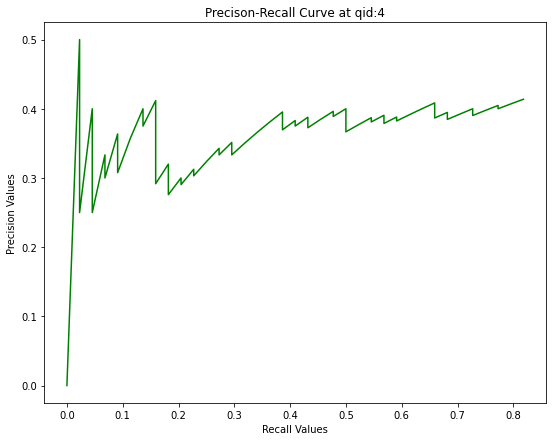

In [27]:
plt.figure(figsize=(9,7))

plt.plot(array_recall,array_precision,color='green')

plt.xlabel('Recall Values')
plt.ylabel('Precision Values')

plt.title('Precison-Recall Curve at qid:4')